In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
# Loading the dataset
boston=load_boston()
x=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.Series(boston.target,name='MEDV')

C:\Users\vignesh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [6]:
# splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
#modeling the algorithm
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [8]:
y_pred=dtr.predict(x_test)
y_pred

array([28.1, 33.1, 15.2, 21.7, 23.2, 18.5, 16.6, 16.7, 22.7, 22. , 27.1,
       27.1,  7.4, 21.5, 18.7, 23.9, 21.4, 10.5, 44. , 13. , 22.6, 24.4,
       13.6, 22. , 13.5, 13.5, 21. , 14.9, 19.4, 20.7, 18.8, 23.1, 17.8,
       15. , 13.3, 15.6, 33.4, 19. , 22.4, 24.8, 19.8, 28.4, 46. , 18.2,
       22. , 13. , 14.3, 24.1, 17.7, 33.1, 19.7, 34.9, 16.7, 32. , 43.1,
       19.5, 15.6, 27.9, 22. , 22.5, 24.8, 33. , 29.4, 16.1, 27.9, 14.4,
       13. , 23.2, 28. , 14.1, 21.2, 28.7,  8.3, 18.6, 21.5, 10.5, 19.2,
       50. , 13.3,  8.1, 21. , 12. , 19.4, 10.5, 16.2, 30.1, 14.3, 23. ,
       23.2, 18. , 23.3,  8.8, 19.8, 17.5, 15. , 19.2, 50. , 11.9, 11.7,
       10.2, 18.5, 28.1])

In [9]:
# mean squared error
print(mean_squared_error(y_test,y_pred))

11.506764705882356


In [13]:
# Visualize the decision tree regression line (optional)
x_test_sorted = x_test.sort_values(by=x_test.columns[0])  # Using the first feature for visualization
y_pred_sorted = dtr.predict(x_test_sorted)

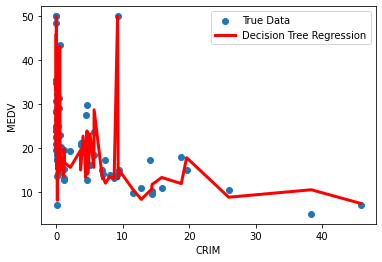

In [14]:
# ploting the graph
plt.scatter(x_test[x_test.columns[0]], y_test, label='True Data')
plt.plot(x_test_sorted[x_test.columns[0]], y_pred_sorted, color='red', linewidth=3, label='Decision Tree Regression')
plt.xlabel(x_test.columns[0])
plt.ylabel('MEDV')
plt.legend()
plt.show()